In [2]:
#Load other modules
import matplotlib.pyplot as plt  #Graphics
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score
#To show graphs within the notebook
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#load the datasets
train = pd.read_csv("input/trains.csv")
test = pd.read_csv("input/tests.csv")

In [4]:
#Printing the size of the dataframe
print ("Training dataset has %i observations and %i variables" %(train.shape[0], train.shape[1]))
print ("Testing dataset has %i observations and %i variables" %(test.shape[0], test.shape[1]))

Training dataset has 60000 observations and 785 variables
Testing dataset has 10000 observations and 785 variables


In [5]:
#check few rows
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Seperate the target and independant variables
df_x=train.iloc[:,1:]
df_y=train.iloc[:,0]

In [7]:
def print_image(row, df):
    temp=df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    plt.imshow(temp)

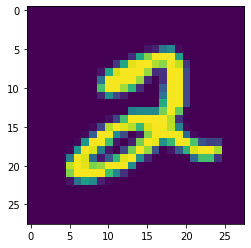

In [8]:
print_image(5, df_x)

In [9]:
#Check the frequency of each number
df_y.value_counts().sort_index()

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: label, dtype: int64

/Users/lihui/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

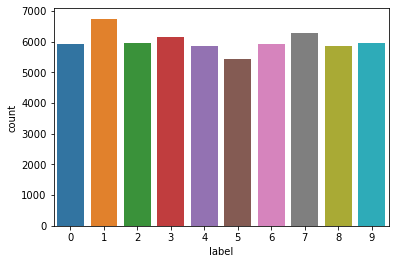

In [10]:
sns.countplot(df_y)

In [11]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(48000, 784)
(12000, 784)


In [12]:
#training random Forest
rf=RandomForestClassifier(n_estimators=20)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [13]:
pred=rf.predict(X_test)
print ("Classification Report")
print(classification_report(y_test, pred))
print ("Confusion Report")
print(confusion_matrix(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1205
           1       0.98      0.99      0.99      1379
           2       0.95      0.96      0.95      1166
           3       0.95      0.94      0.95      1208
           4       0.96      0.97      0.96      1153
           5       0.94      0.94      0.94      1075
           6       0.98      0.98      0.98      1190
           7       0.96      0.96      0.96      1228
           8       0.95      0.93      0.94      1191
           9       0.95      0.93      0.94      1205

    accuracy                           0.96     12000
   macro avg       0.96      0.96      0.96     12000
weighted avg       0.96      0.96      0.96     12000

Confusion Report
[[1189    0    4    0    0    3    2    1    5    1]
 [   0 1364    3    4    4    0    1    1    1    1]
 [   5    1 1123    9    6    0    3   12    6    1]
 [   0    3   16 1141    0   22    0   12  

In [14]:
score = cross_val_score(rf, df_x, df_y)
print (np.mean(score))

0.9565666666666666
